In [1]:
# Data Preprocessing Template

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
% matplotlib
# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')

In [2]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [3]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
# Labelencoder keeps the data structure (X) but transforms to numbers
X[:,3] = labelencoder_X.fit_transform(X[:, 3])
# One hot encoder MAKES NEW COLUMNS based off the unique labels above
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()

In [4]:
# avoiding the dummy variable trap (manual technique):
# drop first column, by copying to data structure without that column
X = X[:,1:]

In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:

# Feature Scaling - NOT REQUIRED, this algo. does it for us...
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [7]:
# fitting the multiple linear regression to the data set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
y_pred = regressor.predict(X_test)

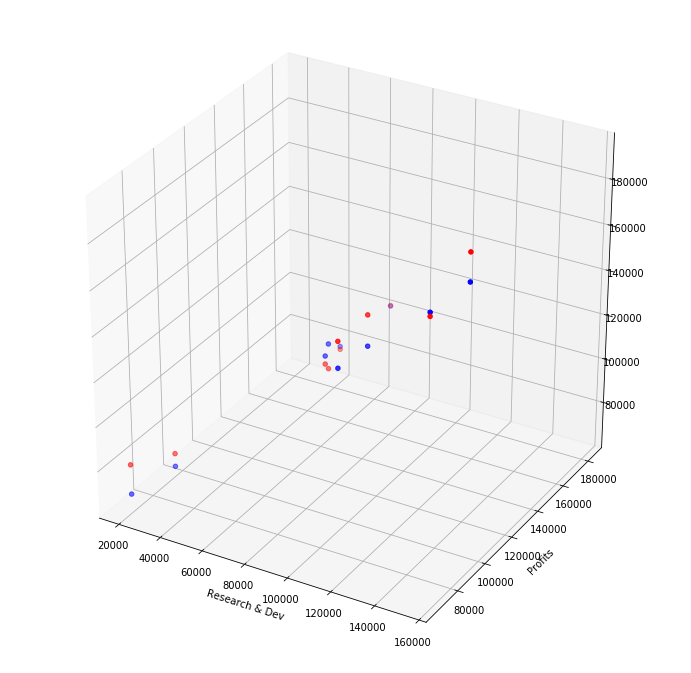

In [9]:
#### NOT IN TUTORIAL-> MY OWN PROGRAMMING #####
# can't plot because it would be greater than 3-d, however,
# here I have plotted profits against R&D and Admin costs


# plot the predicted vs. actual
R_D_spend_test = X_test[:,2]
Admin_test = X_test[:,3]

R_D_spend=[];Admin=[];actual_y=[]
for i in range(len(dataset)):
    for j in range(len(X_test)):
        if X_test[j][2] == dataset.loc[[i],'R&D Spend'].values[0]:
            R_D_spend.append(dataset.loc[[i],'R&D Spend'].values[0])
            Admin.append(dataset.loc[[i],'Administration'].values[0])
            actual_y.append(dataset.loc[[i],'Profit'].values[0])

fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
ax.set_xlabel('Research & Dev')
ax.set_ylabel('Profits')

ax.scatter3D(R_D_spend,Admin,actual_y,color='red')
ax.scatter(R_D_spend_test,Admin_test,regressor.predict(X_test),color='blue')